In [5]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [6]:
df = pd.read_csv(r"E:\Data Science by SRK\Machine_learning\Classification\mouse_data\cleaned_dataset_mouse.csv")

In [7]:
df

,Med_1_mL,Med_2_mL,Virus_Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


# X and y

In [8]:
X = df.drop(columns = ['Virus_Present'])
y = df['Virus_Present']

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = True)

# Modelling and evaluation

**Decision Tree classifier- with default hyperparameter**

In [10]:
# modeling
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(random_state = True)
dt_default.fit(X_train, y_train)

# Prediction
pred_train = dt_default.predict(X_train)
pred_test = dt_default.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy : ", accuracy_score(pred_train, y_train))
print("Test Accuracy : ", accuracy_score(pred_test, y_test))

from sklearn.model_selection import cross_val_score
print("cross_val_score : ", cross_val_score(dt_default, X, y, cv=5).mean())


Train Accuracy :  1.0
Test Accuracy :  1.0
cross_val_score :  0.9925


# visualize Tree

In [11]:
X_train.columns.tolist()

['Med_1_mL', 'Med_2_mL']

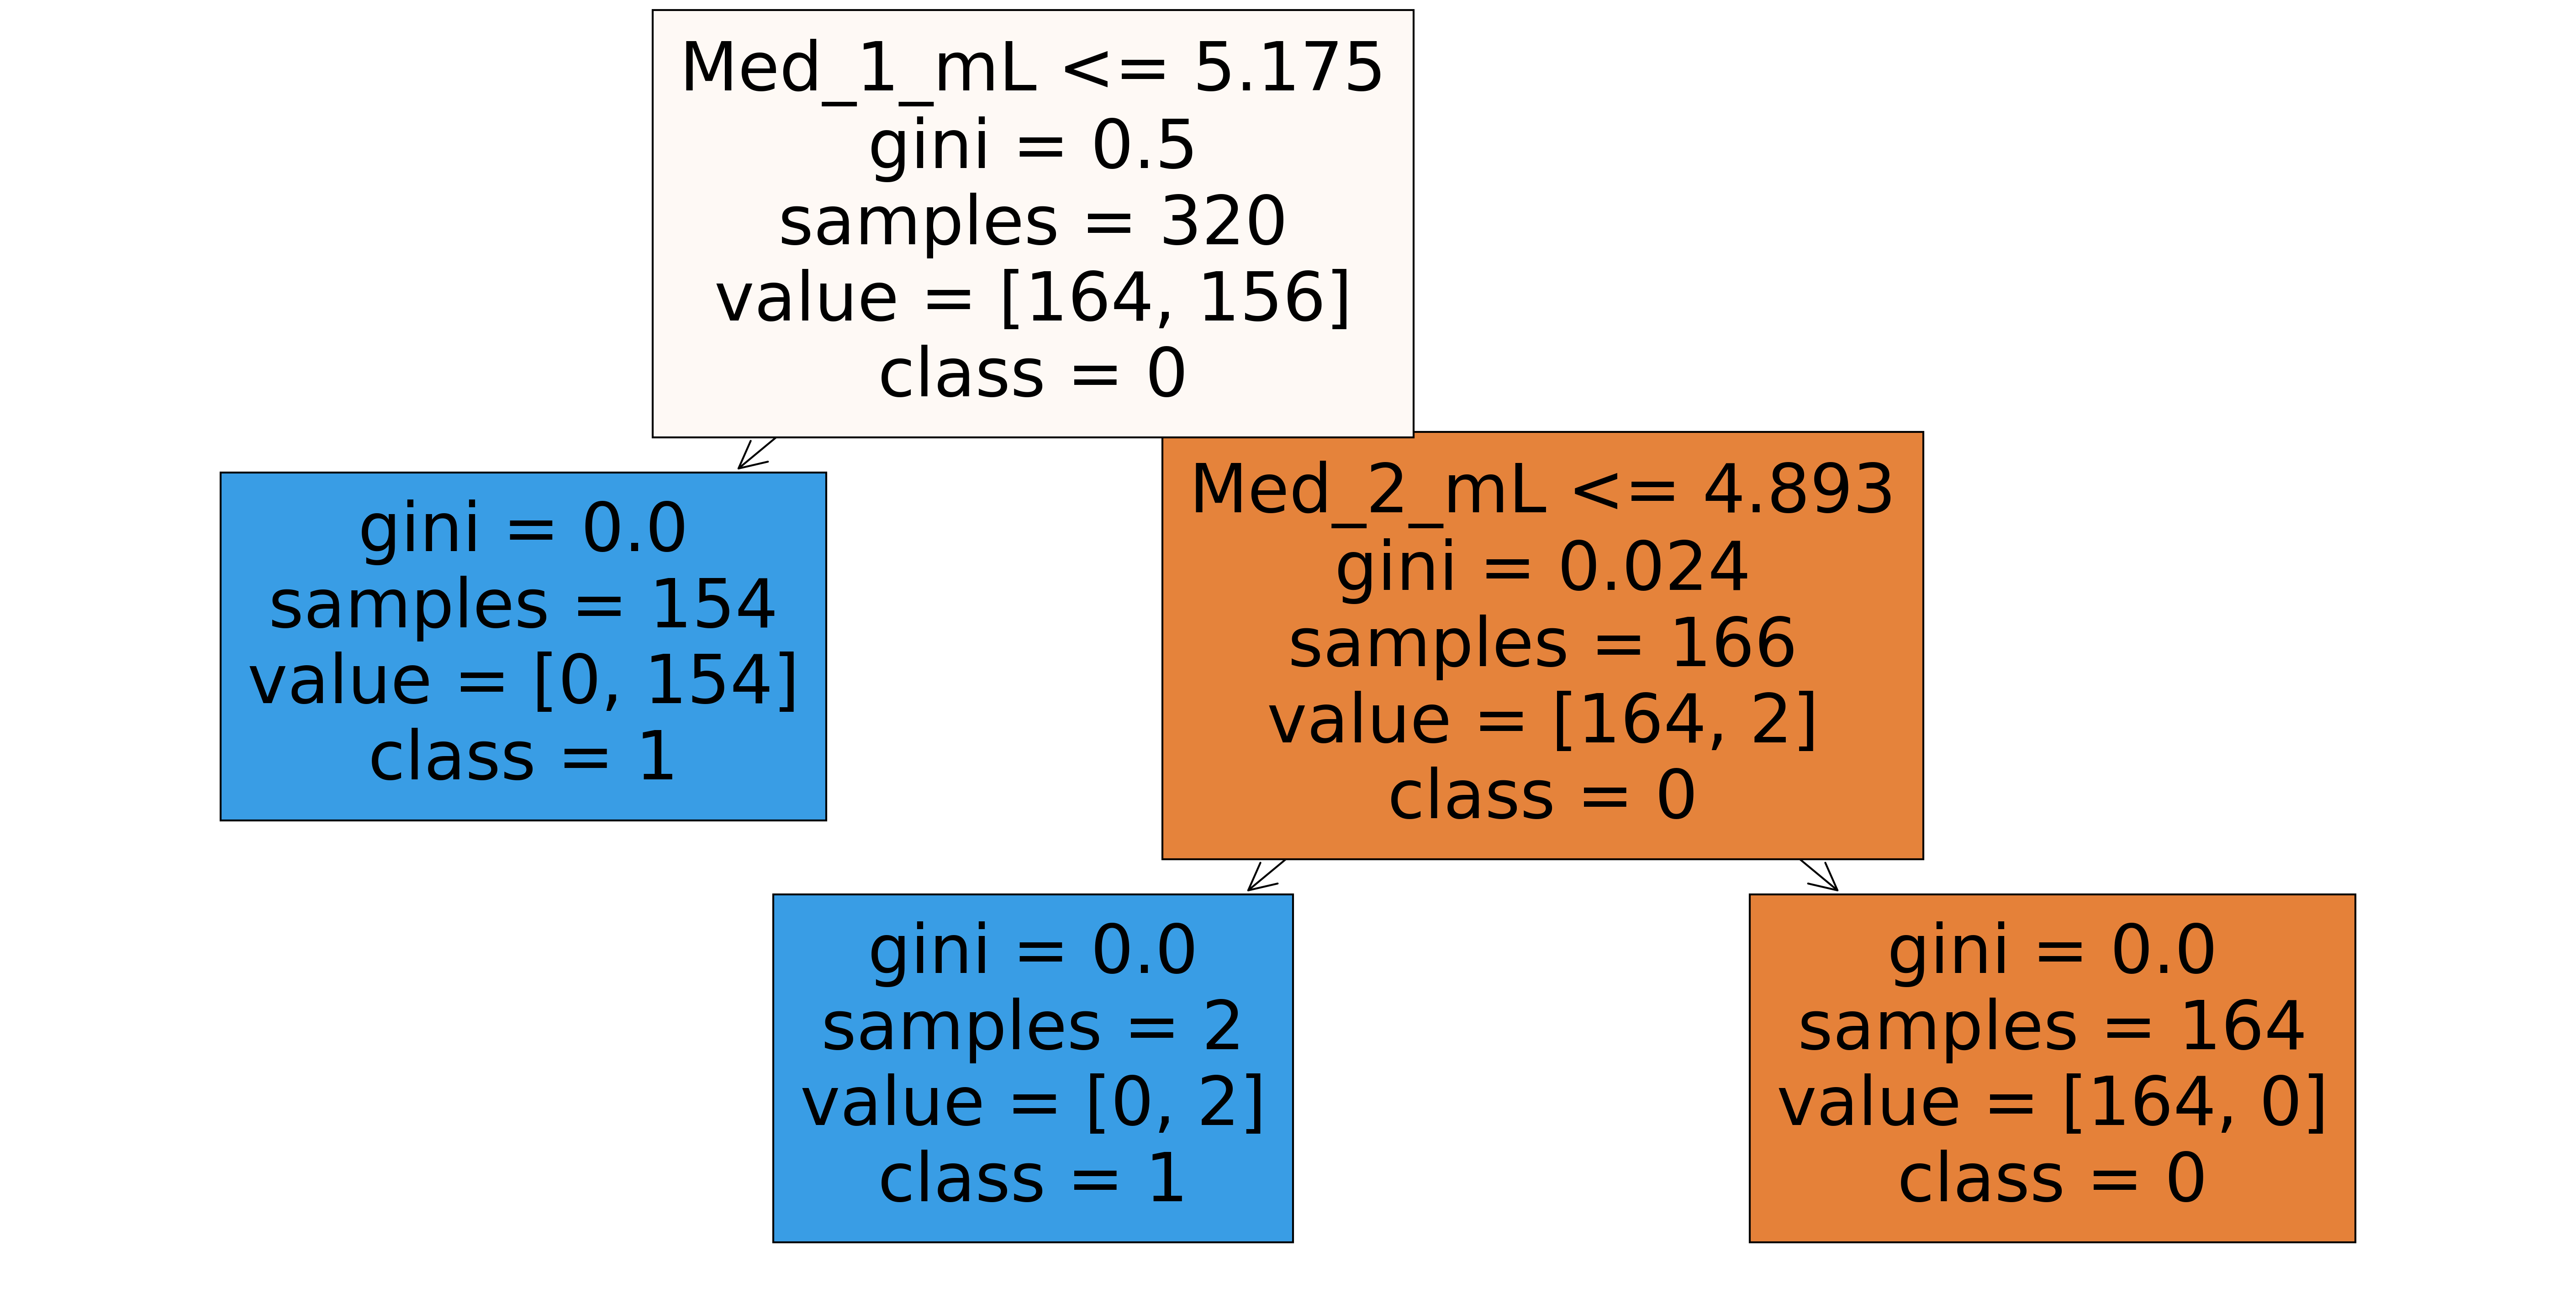

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12), dpi = 300)

plot_tree(dt_default,
         filled = True,
         feature_names = X_train.columns.tolist(),
         class_names = ['0','1']
         )
plt.show()

In [13]:
print("Depth of the tree:", dt_default.get_depth())


Depth of the tree: 2


# HyperParameter Tuning

In [14]:
from sklearn.model_selection import GridSearchCV

# model
estimator = DecisionTreeClassifier(random_state = True)

# Parameters (which you want to tune and identify the best)
param_grid = {"criterion" : ['gini', 'entropy'], 
             'max_depth' : [1,2,3,4,5]}


grid = GridSearchCV(estimator, param_grid, scoring = 'accuracy', cv= 5)

grid.fit(X_train, y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [15]:
grid.best_estimator_.feature_importances_

array([0.97528576, 0.02471424])

In [16]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                    index = X.columns,
                    columns = ['Feature Importance'])
feats_imp = feats[feats['Feature Importance'] > 0]
important_features_list = feats_imp.index.to_list()
important_features_list

['Med_1_mL', 'Med_2_mL']

# Final Decision Tree model
**with best hyper parameters and imp_features**

In [17]:
# input with important features
X_imp = X[important_features_list]

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size = 0.2, random_state = True)

# Model with best hyperparameters
final_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = True)
final_dt_model.fit(X_train, y_train)

ypred_train = final_dt_model.predict(X_train)
ypred_test = final_dt_model.predict(X_test)

# Evaluation
print("Train Accuracy : ", accuracy_score(ypred_train, y_train))
print("Test Accuracy : ", accuracy_score(ypred_test, y_test))
print("Cross_val_score : ", cross_val_score(final_dt_model, X_imp, y, cv=5).mean())

Train Accuracy :  1.0
Test Accuracy :  1.0
Cross_val_score :  0.9925


In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, ypred_test)

array([[36,  0],
       [ 0, 44]], dtype=int64)